### Question 4

#### Import relevant packages

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

#### (a) Load the dataset `mnist_corrupted/zigzag` from `tensorflow_datasets`. [**2 points**]

In [3]:
import tensorflow_datasets as tfds

## write your code here
dataset_name = "mnist_corrupted/zigzag"
train_ds = tfds.load(dataset_name, split='train', batch_size=-1, as_supervised=True)
test_ds = tfds.load(dataset_name, split='test', batch_size=-1, as_supervised=True)

c:\Users\jinha\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
train_images, train_labels = tfds.as_numpy(train_ds)
test_images, test_labels   = tfds.as_numpy(test_ds)

In [4]:
# Test size of different loaded numpy arrays
print('Image size:', train_images[0].shape)
print('Training data size:',train_images.shape)
print('Training labels size:', train_labels.shape)
print('Testing data size:', test_images.shape)

Image size: (28, 28, 1)
Training data size: (60000, 28, 28, 1)
Training labels size: (60000,)
Testing data size: (10000, 28, 28, 1)


#### (b) Build a dense ANN with at least one hidden layer with at least two nodes. You should try different hyper parameter configurations to get the best performing ANN (atleast 90% accuracy). [**2 points**]

In [242]:
model = tf.keras.Sequential()
outputs = 10 #because there are 10 digits in mnist
## write your code here to build your dense ANN. Input layer is created below
model.add(layers.Flatten(input_shape=(train_images[0].shape)))
model.add(layers.Dense(10, activation=tf.nn.relu))
model.add(layers.Dense(20, activation=tf.nn.relu))
model.add(layers.Dense(20, activation=tf.nn.relu))
model.add(layers.Dense(60, activation=tf.nn.relu))
model.add(layers.Dense(60, activation=tf.nn.relu))
model.add(layers.Dense(80, activation=tf.nn.relu))
model.add(layers.Dense(80, activation=tf.nn.relu))
model.add(layers.Dense(100, activation=tf.nn.relu))
model.add(layers.Dense(100, activation=tf.nn.relu))
model.add(layers.Dense(80, activation=tf.nn.relu))
model.add(layers.Dense(80, activation=tf.nn.relu))
model.add(layers.Dense(60, activation=tf.nn.relu))
model.add(layers.Dense(60, activation=tf.nn.relu))
model.add(layers.Dense(20, activation=tf.nn.relu))
model.add(layers.Dense(20, activation=tf.nn.relu))
model.add(layers.Dense(10, activation=tf.nn.softmax))

#10, 20, 20, 12 *
# 10, 2* 20, 4 * 60, 100
# 10, 2*20, 2*60, 2*80, 100
model.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_77 (Flatten)        (None, 784)               0         
                                                                 
 dense_1185 (Dense)          (None, 10)                7850      
                                                                 
 dense_1186 (Dense)          (None, 20)                220       
                                                                 
 dense_1187 (Dense)          (None, 20)                420       
                                                                 
 dense_1188 (Dense)          (None, 60)                1260      
                                                                 
 dense_1189 (Dense)          (None, 60)                3660      
                                                                 
 dense_1190 (Dense)          (None, 80)              

#### (c) Answer the following questions: [**1 point**]

What is the size of your output layer? [10]

What is the activation function of your output layer? [softmax]

#### (d) Compile and train your model [**2 points**]

What is the loss function you use? [sparse_categorical_crossentropy]

In [243]:
### write your code here to compile model
model.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [244]:
### write your code here to train your model
epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8529 - accuracy: 0.7117
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4818 - accuracy: 0.8615
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4243 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3942 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8942
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3584 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3499 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3394 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3300 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.324

#### (e) Plot the training loss across the different epochs [**1 point**]

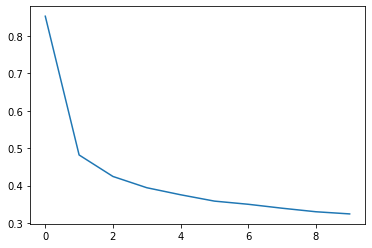

In [245]:
plt.plot(history.history["loss"])

#### (f) What is the overall accuracy and per-class accuracy on test dataset? [**1 point**]

In [246]:
#### write your code to report overall accuracy on test set
test_results = model.evaluate(test_images, test_labels, return_dict=True)
# print(test_results)
print('Test accuracy:', test_results['accuracy'])

313/313 [==============================] - 0s 987us/step - loss: 0.3580 - accuracy: 0.9053
Test accuracy: 0.9053000211715698


What is the overall accuracy? [0.9053000211715698]

313/313 [==============================] - 0s 933us/step


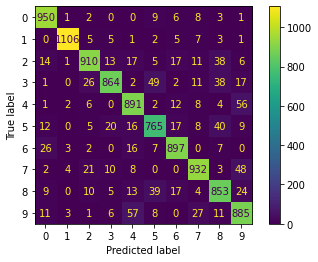

In [247]:
### write your code to report per-class accuracy
### Use confusion matrix from sklearn. 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
image_pred = model.predict(test_images)
image_pred_classes = image_pred.argmax(axis=-1)
labels = [0,1,2,3,4,5,6,7,8,9]
cm = confusion_matrix(test_labels, image_pred_classes, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

**Code to visualize the predictions**

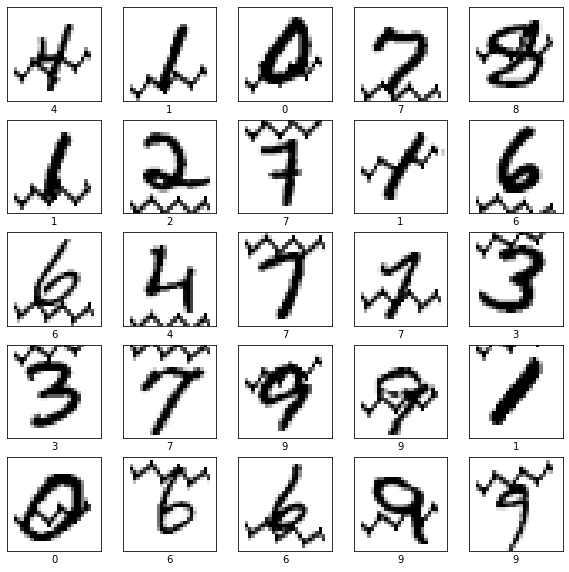

In [248]:
import matplotlib.pyplot as plt
%matplotlib inline
class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    #print(train_labels[i][0])
    plt.xlabel(class_names[train_labels[i]])